In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Roadmap:
# 1. Create polynomial features
# 2. Build elastic net and find best tuning with gridsearch
# 4. evaluate with cross-validation
# 5. train final model and evaluate final RMSE
# 6. predict house prices of the provided test set

In [3]:
df = pd.read_csv('data/training_set_without_outliers.csv')
df_test = pd.read_csv('data/preprocessed_test_set.csv')

In [4]:
# train test split for polynomial and linear features
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pickle.dump(scaler, open('model/scaler.ml', 'wb'))

In [6]:
from sklearn.linear_model import ElasticNet

base_elastic_net_model = ElasticNet(max_iter=100000)

alpha_params = (np.linspace(.1, 100, 100)).tolist()
l1_ratio_params = (np.linspace(1, 100, 99)/100).tolist()

param_grid = {'alpha': alpha_params, 'l1_ratio': l1_ratio_params}
param_grid

{'alpha': [0.1,
  1.1090909090909091,
  2.118181818181818,
  3.1272727272727274,
  4.136363636363636,
  5.145454545454545,
  6.154545454545454,
  7.163636363636363,
  8.172727272727272,
  9.181818181818182,
  10.19090909090909,
  11.2,
  12.209090909090909,
  13.218181818181817,
  14.227272727272727,
  15.236363636363635,
  16.245454545454546,
  17.254545454545454,
  18.263636363636365,
  19.272727272727273,
  20.28181818181818,
  21.290909090909093,
  22.3,
  23.30909090909091,
  24.31818181818182,
  25.327272727272728,
  26.336363636363636,
  27.345454545454544,
  28.354545454545455,
  29.363636363636363,
  30.37272727272727,
  31.381818181818183,
  32.39090909090909,
  33.4,
  34.40909090909091,
  35.418181818181814,
  36.42727272727273,
  37.43636363636364,
  38.445454545454545,
  39.45454545454545,
  40.46363636363636,
  41.47272727272727,
  42.481818181818184,
  43.49090909090909,
  44.5,
  45.50909090909091,
  46.518181818181816,
  47.527272727272724,
  48.53636363636364,
  49.5

In [7]:
from sklearn.model_selection import RandomizedSearchCV

grid_model = RandomizedSearchCV(base_elastic_net_model, param_grid, scoring='neg_mean_squared_error', n_iter=5000, n_jobs=8, cv=5, verbose=2)

In [8]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
[CV] END alpha=64.68181818181817, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=73.76363636363635, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=73.76363636363635, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END alpha=7.163636363

[CV] END alpha=25.327272727272728, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=32.39090909090909, l1_ratio=0.525204081632653; total time=   0.0s
[CV] END alpha=32.39090909090909, l1_ratio=0.525204081632653; total time=   0.0s
[CV] END alpha=

[CV] END alpha=25.327272727272728, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END alpha=73.76363636363635, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] EN

[CV] END alpha=64.68181818181817, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=60.64545454545454, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=60.64545454545454, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=60.64545454545454, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.5656122448979591; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END

[CV] END alpha=63.67272727272727, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END al

[CV] END alpha=25.327272727272728, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.5959183673469387; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.5959183673469387; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=73.76363636363635, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=73.76363636363635, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END 

[CV] END alpha=84.86363636363636, l1_ratio=0.5555102040816327; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.5555102040816327; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.27265306122448973; total time=   0.0s
[CV

[CV] END alpha=50.554545454545455, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=27.345454545454544, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=27.345454545454544, l1_ratio=0.32316326530612244; total time=   0.0s
[CV

[CV] END alpha=37.43636363636364, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=49.54

[CV] END ............alpha=0.1, l1_ratio=0.12112244897959183; total time=   0.1s
[CV] END ............alpha=0.1, l1_ratio=0.12112244897959183; total time=   0.1s
[CV] END alpha=63.67272727272727, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END ....

[CV] END alpha=26.336363636363636, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.09081632653061224; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.09081632653061224; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.09081632653061224; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.09081632653061224; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.09081632653061224; total time=   

[CV] END alpha=66.69999999999999, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=26.336363636363636, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alp

[CV] END alpha=72.75454545454545, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=47.527272727272724, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=47.527272727272724, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=47.527272727272724, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=47.527272727272724, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alp

[CV] END alpha=28.354545454545455, l1_ratio=0.28275510204081633; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.28275510204081633; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=50.554545454545455, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] EN

[CV] END alpha=6.154545454545454, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.14132653061224487; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.14132653061224487; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.14132653061224487; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.14132653061224487; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.14132653061224487; total time=   0.0s
[

[CV] END alpha=45.50909090909091, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END 

[CV] END alpha=67.7090909090909, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END alpha=72.75454545454545, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] 

[CV] END alpha=38.445454545454545, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=84.86363636363636, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha

[CV] END alpha=35.418181818181814, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.6363265306122448; total time=   0.0s
[

[CV] END alpha=48.53636363636364, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.08071428571428571; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.8080612244897958; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.8080612244897958; total time=   0.0s
[CV] END

[CV] END alpha=20.28181818181818, l1_ratio=0.17163265306122447; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.17163265306122447; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=30.37272727272727, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.525204081632653; total time=   0.0s
[CV] END alpha=45

[CV] END alpha=25.327272727272728, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END ...........alpha=33.4, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END 

[CV] END ............alpha=44.5, l1_ratio=0.4544897959183673; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=70.73636363636362, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=70.73636363636362, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] EN

[CV] END alpha=98.99090909090908, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.9595918367346938; total time=   0.0s
[CV] END alpha=6.154545454545454, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.03020408163265306; total time=   0.0s
[CV] END alp

[CV] END alpha=96.97272727272727, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=20.28181818181818, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha

[CV] END alpha=47.527272727272724, l1_ratio=0.8383673469387755; total time=   0.0s
[CV] END alpha=47.527272727272724, l1_ratio=0.8383673469387755; total time=   0.0s
[CV] END alpha=47.527272727272724, l1_ratio=0.8383673469387755; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END 

[CV] END alpha=8.172727272727272, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.525204081632653; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END al

[CV] END alpha=97.98181818181817, l1_ratio=0.36357142857142855; total time=   0.0s
[CV] END alpha=97.98181818181817, l1_ratio=0.36357142857142855; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END alpha

[CV] END alpha=72.75454545454545, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=72.75454545454545, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=72.75454545454545, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END .alpha=71.74545454545454, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END .alpha=71.74545454545454, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END .alpha=71.74545454545454, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END .alpha=71.74545454545454, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END .alpha=71.74545454545454, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END ..............alpha=87.89090909090908, l1_ratio=1.0; total time=   0.1s
[CV] END ..............alpha=87.89090909090908, l1_ratio=1.0; total time=   0.1s
[CV] END ..............alpha=87.89090909090908, l1_ratio=1.0; total time=   0.1s
[CV] END ..............

[CV] END alpha=88.89999999999999, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END alpha=93.94545454545454, l1_ratio=0.6767346938775509; total time=   0.0s
[CV] END alpha=93.94545454545454, l1_ratio=0.6767346938775509; total time=   0.0s
[CV] END alpha=93.94545454545454, l1_ratio=0.6767346938775509; total time=   0.0s
[CV] END alpha=93.94545454545454, l1_ratio=0.6767346938775509; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=22.3, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END alpha=60.64545454545454, l1_ratio=0.35346938775510206; total time=   0.0s
[CV] END alpha=60.64

[CV] END alpha=24.31818181818182, l1_ratio=0.17163265306122447; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.28275510204081633; total time=   0.1s
[CV] END ............alpha=0.1, l1_ratio=0.28275510204081633; total time=   0.1s
[CV] END ............alpha=0.1, l1_ratio=0.28275510204081633; total time=   0.1s
[CV] END ............alpha=0.1, l1_ratio=0.28275510204081633; total time=   0.1s
[CV] END ............alpha=0.1, l1_ratio=0.28275510204081633; total time=   0.1s
[CV] END alpha=8.172727272727272, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha

[CV] END alpha=60.64545454545454, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=60.64545454545454, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=60.64545454545454, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=68.7181818181818, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END ............alpha=18.263636363636365, l1_ratio=0.01; total time=   0.0s
[CV] END ............alpha=18.263636363636365, l1_ratio=0.01; total time=   0.0s
[CV] END .

[CV] END alpha=32.39090909090909, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=32.39090909090909, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=32.39090909090909, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=32.39090909090909, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=3.1272727272727274, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=3.1272727272727274, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=3.1272727272727274, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=3.1272727272727274, l1_ratio=0.9191836734693877; total time=   0.1s
[CV] END alpha=3.1272727272727274, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=69.72727272727272, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=69.72727272727272, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END alpha=69.72727272727272, l1_ratio=0.8888775510204081; total time=   0.0s
[CV] END al

[CV] END alpha=45.50909090909091, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END ...........alpha=22.3, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END ...........alpha=22.3, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=3

[CV] END alpha=28.354545454545455, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.6666326530612244; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END .............alpha=83.85454545454544, l1_ratio=0.01; total time=   0.0s
[CV] END .............alpha=83.85454545454544, l1_ratio=0.01; total time=   0.0s
[CV] END .............alpha=83.85454545454544, l1_ratio=0.01; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=

[CV] END ...........alpha=100.0, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END ...........alpha=100.0, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END ...........alpha=100.0, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END ...........alpha=100.0, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.040306122448979596; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.040306122448979596; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.040306122448979596; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.040306122448979596; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.040306122448979596; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.5656122448979591; total time=   0.0s
[CV

[CV] END alpha=48.53636363636364, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha

[CV] END alpha=68.7181818181818, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=68.7181818181818, l1_ratio=0.12112244897959183; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.6060204081632652; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.9595918367346938; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.9595918367346938; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.9595918367346938; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.9595918367346938; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.9595918367346938; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=48.

[CV] END alpha=88.89999999999999, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=97.98181818181817, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=97.98181818181817, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=97.98181818181817, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=97.98181818181817, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=97.98181818181817, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=29.363636363636363, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=29.363636363636363, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=29.363636363636363, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END

[CV] END alpha=70.73636363636362, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=70.73636363636362, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=70.73636363636362, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=70.73636363636362, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=70.73636363636362, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=58.627272727272725, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=58.627272727272725, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.4746938775510203; total time=   0.0s
[CV] END

[CV] END alpha=71.74545454545454, l1_ratio=0.3332653061224489; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.3332653061224489; total time=   0.0s
[CV] END alpha=40.46363636363636, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=40.46363636363636, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=40.46363636363636, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=40.46363636363636, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=40.46363636363636, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END al

[CV] END ...........alpha=55.6, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END ...........alpha=55.6, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END ...........alpha=55.6, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.4544897959183673; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.4544897959183673; total time=   0.0s
[CV] END alpha=52.5

[CV] END alpha=4.136363636363636, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=19.272727272727273, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=19.272727272727273, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=19.272727272727273, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=19.272727272727273, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=19.272727272727273, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END

[CV] END ............alpha=55.6, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.5049999999999999; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=64.68181818181817, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=2.118181

[CV] END alpha=93.94545454545454, l1_ratio=0.36357142857142855; total time=   0.0s
[CV] END alpha=93.94545454545454, l1_ratio=0.36357142857142855; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.5757142857142857; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha

[CV] END alpha=51.56363636363636, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.46459183673469384; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=38.445454545454545, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] E

[CV] END alpha=58.627272727272725, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=29.363636363636363, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=29.363636363636363, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=58.627272727272725, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=58.627272727272725, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=58.627272727272725, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=58.627272727272725, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END

[CV] END alpha=10.19090909090909, l1_ratio=0.7878571428571428; total time=   0.0s
[CV] END alpha=10.19090909090909, l1_ratio=0.7878571428571428; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END ............alpha=44.5, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=7.163636363636363, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=61.654545454545456, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alph

[CV] END alpha=63.67272727272727, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.24234693877551017; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] E

[CV] END alpha=39.45454545454545, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alp

[CV] END alpha=69.72727272727272, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=69.72727272727272, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=69.72727272727272, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.7676530612244897; total time=   0.0s
[CV] END alph

[CV] END alpha=57.61818181818182, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END ...........alpha=22.3, l1_ratio=0.42418367346938773; total time=   0.0s
[CV] END alpha=52.57272727272727, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=52.57272727272727, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=52.57272727272727, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=52.57272727272727, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=52.57272727272727, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END ..alpha=78.8090909090909, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END ..alpha=78.8090909090909, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END ..alpha=78.8090909090909, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END ..alpha=78.8090909090909, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END ..alpha=78.8

[CV] END alpha=76.79090909090908, l1_ratio=0.8383673469387755; total time=   0.0s
[CV] END alpha=76.79090909090908, l1_ratio=0.8383673469387755; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END alpha=57.61818181818182, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END alpha=17.254545454545454, l1_ratio=0.050408163265306116; total time=   0.0s
[CV] END alpha=17.254545454545454, l1_ratio=0.050408163265306116; total time=   0.0s
[CV] END a

[CV] END alpha=19.272727272727273, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=19.272727272727273, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=87.89090909090908, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6363265306122448; total time=   0.0s
[CV] END .....

[CV] END alpha=27.345454545454544, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=27.345454545454544, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=27.345454545454544, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=27.345454545454544, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=59.63636363636363, l1_ratio=0.6464285714285714; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alp

[CV] END alpha=42.481818181818184, l1_ratio=0.8080612244897958; total time=   0.0s
[CV] END alpha=42.481818181818184, l1_ratio=0.8080612244897958; total time=   0.0s
[CV] END alpha=42.481818181818184, l1_ratio=0.8080612244897958; total time=   0.0s
[CV] END alpha=42.481818181818184, l1_ratio=0.8080612244897958; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.11102040816326529; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.11102040816326529; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.11102040816326529; total time=   0.0s
[CV] END 

[CV] END alpha=88.89999999999999, l1_ratio=0.14132653061224487; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.14132653061224487; total time=   0.0s
[CV] END alpha=98.99090909090908, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=98.99090909090908, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=98.99090909090908, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=98.99090909090908, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=98.99090909090908, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END ...........alpha=77.8, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END ...........alpha=77.8, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END ...........alpha=77.8, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END ...........alpha=77.8, l1_ratio=0.13122448979591836; total time=   0.0s
[CV] END alpha=1.

[CV] END alpha=50.554545454545455, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=79.81818181818181, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=79.81818181818181, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=79.81818181818181, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=79.81818181818181, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=79.81818181818181, l1_ratio=0.34336734693877546; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] EN

[CV] END alpha=24.31818181818182, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=67.7090909090909, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=67.7090909090909, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=67.7090909090909, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=67.7090909090909, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=67.7090909090909, l1_ratio=0.1514285714285714; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=49.54545454545455, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=49.545

[CV] END alpha=1.1090909090909091, l1_ratio=0.09081632653061224; total time=   0.1s
[CV] END alpha=71.74545454545454, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=71.74545454545454, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.7878571428571428; total time=   0.0s
[CV] END ............alpha=11.2, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END ............alpha=11.2, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END ............alpha=11.2, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=42.481818181818184, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=42.481818181818184, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END a

[CV] END alpha=74.77272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=39.45454545454545, l1_ratio=0.37367346938775503; total time=   0.0s
[CV] END alpha=15.236363636363635, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=54.590909090909086, l1_ratio=0.19183673469387752; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.22214285714285711; total time=   0.0s
[CV

[CV] END alpha=51.56363636363636, l1_ratio=0.22214285714285711; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.22214285714285711; total time=   0.0s
[CV] END alpha=2.118181818181818, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=2.118181818181818, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.9797959183673468; total time=   0.1s
[CV] END alpha=5.145454545454545, l1_ratio=0.9797959183673468; total time=   0.1s
[CV] END alpha=5.145454545454545, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.9797959183673468; total time=   0.1s
[CV] END ...........alpha=100.0, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END ...........alpha=100.0, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END ...........alpha=100.0, l1_ratio=0.3938775510204081; total time=   0.0s
[CV] END ........

[CV] END ............alpha=33.4, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END ............alpha=33.4, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END ............alpha=33.4, l1_ratio=0.7777551020408162; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.10091836734693876; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.8585714285714284; total time=   0.0s
[CV] END alpha=36.42727272727273, l1_ratio=0.6262244897959183; total time=   0.0s
[CV] END alph

[CV] END alpha=25.327272727272728, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.7878571428571428; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.7878571428571428; total time=   0.0s
[CV] END alpha=53.58181818181818, l1_ratio=0.7878571428571428; total time=   0.0s
[CV] END al

[CV] END alpha=5.145454545454545, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=5.145454545454545, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END ............alpha=21.290909090909093, l1_ratio=0.01; total time=   0.0s
[CV] END ............alpha=21.290909090909093, l1_ratio=0.01; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.4847959183673469; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=8

[CV] END alpha=82.84545454545453, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.4342857142857142; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=4.136363636363636, l1_ratio=0.3837755102040816; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.5555102040816327; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.5555102040816327; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.5555102040816327; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.5555102040816327; total time=   0.0s
[CV] END alpha=5

[CV] END alpha=43.49090909090909, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.868673469387755; total time=   0.0s
[CV] END alpha=

[CV] END alpha=28.354545454545455, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.828265306122449; total time=   0.0s
[CV] END ............alpha=100.0, l1_ratio=0.656530612244898; total time=   0.0s
[CV] END ............alpha=100.0, l1_ratio=0.656530612244898; total time=   0.0s
[CV] END ............alpha=100.0, l1_ratio=0.656530612244898; total time=   0.0s
[CV] END ............alpha=100.0, l1_ratio=0.656530612244898; total time=   0.0s
[CV] END ............alpha=100.0, l1_ratio=0.656530612244898; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=46.518181818181816, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=46.

[CV] END alpha=1.1090909090909091, l1_ratio=0.5959183673469387; total time=   0.1s
[CV] END alpha=1.1090909090909091, l1_ratio=0.5959183673469387; total time=   0.0s
[CV] END alpha=18.263636363636365, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=18.263636363636365, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=18.263636363636365, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=18.263636363636365, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=18.263636363636365, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.050408163265306116; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.050408163265306116; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.050408163265306116; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.050408163265306116; total time=   0.0s
[CV] END alpha=28.354545454545455, l1_ratio=0.050408163265306116; total ti

[CV] END alpha=66.69999999999999, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.181734693877551; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9797959183673468; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.73734693877551; total time=   0.0s
[CV] END .alpha=78.8090

[CV] END alpha=12.209090909090909, l1_ratio=0.4544897959183673; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.4544897959183673; total time=   0.0s
[CV] END alpha=12.209090909090909, l1_ratio=0.4544897959183673; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=43.49090909090909, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END alpha=62.663636363636364, l1_ratio=0.9090816326530612; total time=   0.0s
[CV] END 

[CV] END alpha=25.327272727272728, l1_ratio=0.30295918367346936; total time=   0.0s
[CV] END alpha=25.327272727272728, l1_ratio=0.30295918367346936; total time=   0.0s
[CV] END alpha=3.1272727272727274, l1_ratio=0.9292857142857142; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=21.290909090909093, l1_ratio=0.44438775510204076; total time=   0.0s
[

[CV] END alpha=45.50909090909091, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=75.78181818181817, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=74.77272727272727, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.40397959183673465; total time=   0.0s
[CV] END alpha

[CV] END alpha=51.56363636363636, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=51.56363636363636, l1_ratio=0.7171428571428571; total time=   0.0s
[CV] END alpha=66.69999999999999, l1_ratio=0.16153061224489795; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.5151020408163265; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alpha=37.43636363636364, l1_ratio=0.02010204081632653; total time=   0.0s
[CV] END alph

[CV] END alpha=14.227272727272727, l1_ratio=0.21204081632653057; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.28275510204081633; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.27265306122448973; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.8181632653061223; total time=   0.0s
[CV

[CV] END alpha=50.554545454545455, l1_ratio=0.9292857142857142; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.06051020408163264; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=80.82727272727271, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=72.75454545454545, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END a

RandomizedSearchCV(cv=5, estimator=ElasticNet(max_iter=100000), n_iter=5000,
                   n_jobs=8,
                   param_distributions={'alpha': [0.1, 1.1090909090909091,
                                                  2.118181818181818,
                                                  3.1272727272727274,
                                                  4.136363636363636,
                                                  5.145454545454545,
                                                  6.154545454545454,
                                                  7.163636363636363,
                                                  8.172727272727272,
                                                  9.181818181818182,
                                                  10.19090909090909, 11.2,
                                                  12.209090909090909,
                                                  13.218181818181817,
                                                  14.22727...
                                                     0.1514285714285714,
                                                     0.16153061224489795,
                                                     0.17163265306122447,
                                                     0.181734693877551,
                                                     0.19183673469387752,
                                                     0.20193877551020406,
                                                     0.21204081632653057,
                                                     0.22214285714285711,
                                                     0.23224489795918365,
                                                     0.24234693877551017,
                                                     0.2524489795918367,
                                                     0.26255102040816325,
                                                     0.27265306122448973,
                                                     0.28275510204081633,
                                                     0.29285714285714287,
                                                     0.30295918367346936, ...]},
                   scoring='neg_mean_squared_error', verbose=2)

In [9]:
# Explore better around best estimator parameters

In [10]:
base_elastic_net_model = ElasticNet(max_iter=100000)

alpha_params = (np.linspace(5, 15, 50)).tolist()
l1_ratio_params = (np.linspace(90, 99, 50)/100).tolist()

param_grid = {'alpha': alpha_params, 'l1_ratio': l1_ratio_params}
param_grid

{'alpha': [5.0,
  5.204081632653061,
  5.408163265306122,
  5.612244897959184,
  5.816326530612245,
  6.020408163265306,
  6.224489795918368,
  6.428571428571429,
  6.63265306122449,
  6.836734693877551,
  7.040816326530612,
  7.244897959183674,
  7.448979591836735,
  7.653061224489796,
  7.857142857142858,
  8.061224489795919,
  8.26530612244898,
  8.46938775510204,
  8.673469387755102,
  8.877551020408163,
  9.081632653061224,
  9.285714285714285,
  9.489795918367347,
  9.693877551020408,
  9.89795918367347,
  10.10204081632653,
  10.306122448979592,
  10.510204081632654,
  10.714285714285715,
  10.918367346938776,
  11.122448979591837,
  11.326530612244898,
  11.53061224489796,
  11.73469387755102,
  11.938775510204081,
  12.142857142857142,
  12.346938775510203,
  12.551020408163264,
  12.755102040816327,
  12.959183673469388,
  13.16326530612245,
  13.36734693877551,
  13.571428571428571,
  13.775510204081632,
  13.979591836734695,
  14.183673469387756,
  14.387755102040817,
  14.

In [11]:
grid_model = RandomizedSearchCV(base_elastic_net_model, param_grid, scoring='neg_mean_squared_error', n_iter=1000, n_jobs=8, cv=10, verbose=2)

In [12]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] END alpha=95.96363636363635, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=95.96363636363635, l1_ratio=0.6161224489795918; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=41.47272727272727, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=41.4727272727272

[CV] END alpha=34.40909090909091, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=34.40909090909091, l1_ratio=0.9393877551020406; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=24.31818181818182, l1_ratio=0.8787755102040815; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.26255102040816325; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.26255102040816325; total time=   0.0s
[CV] END alpha

[CV] END alpha=40.46363636363636, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=68.7181818181818, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=68.7181818181818, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=68.7181818181818, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END alpha=86.88181818181818, l1_ratio=0.07061224489795918; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.9696938775510203; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.9696938775510203; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.9696938775510203; total time=   0.0s
[CV] END .....

[CV] END alpha=82.84545454545453, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=82.84545454545453, l1_ratio=0.23224489795918365; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.44438775510204076; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] END alpha=91.92727272727272, l1_ratio=0.8181632653061223; total time=   0.0s
[CV] EN

[CV] END alpha=20.28181818181818, l1_ratio=0.9898979591836734; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=89.90909090909089, l1_ratio=0.4948979591836734; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=94.95454545454544, l1_ratio=0.7070408163265306; total time=   0.0s
[CV] END alpha=16.245454545454546, l1_ratio=0.7272448979591836; total time=   0.0s
[CV] END alpha=

[CV] END alpha=1.1090909090909091, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=1.1090909090909091, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=35.418181818181814, l1_ratio=0.5858163265306122; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=13.218181818181817, l1_ratio=0.20193877551020406; total time=   0.0s
[CV] END

[CV] END alpha=31.381818181818183, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=31.381818181818183, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END alpha=83.85454545454544, l1_ratio=0.3130612244897959; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ............alpha=55.6, l1_ratio=0.7979591836734693; total time=   0.0s
[CV] END ........

[CV] END ..............alpha=6.154545454545454, l1_ratio=1.0; total time=   1.7s
[CV] END alpha=14.227272727272727, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=14.227272727272727, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=14.227272727272727, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=14.227272727272727, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=14.227272727272727, l1_ratio=0.6969387755102041; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=88.89999999999999, l1_ratio=0.7474489795918366; total time=   0.0s
[CV] END alpha=56.60909090909091, l1_ratio=0.848469387755102; total time=   0.0s
[CV] END alph

[CV] END alpha=96.97272727272727, l1_ratio=0.525204081632653; total time=   0.0s
[CV] END alpha=96.97272727272727, l1_ratio=0.525204081632653; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=63.67272727272727, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=92.93636363636362, l1_ratio=0.9191836734693877; total time=   0.0s
[CV] END alpha=15.

[CV] END alpha=20.28181818181818, l1_ratio=0.41408163265306114; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.9494897959183674; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=81.83636363636363, l1_ratio=0.7575510204081632; total time=   0.0s
[CV] END alpha=85.87272727272726, l1_ratio=0.09081632653061224; total time=   0.0s
[CV] END alpha

[CV] END alpha=50.554545454545455, l1_ratio=0.5454081632653061; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=23.30909090909091, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=65.69090909090909, l1_ratio=0.29285714285714287; total time=   0.0s
[CV] END alpha=45.50909090909091, l1_ratio=0.050408163265306116; total time=   0.0s
[CV

[CV] END alpha=48.53636363636364, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=48.53636363636364, l1_ratio=0.6868367346938774; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=78.8090909090909, l1_ratio=0.8989795918367346; total time=   0.0s
[CV] END alpha=8.172727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=8.172727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=8.172727272727272, l1_ratio=0.32316326530612244; total time=   0.0s
[CV] END alpha=8.1

[CV] END alpha=9.081632653061224, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=12.142857142857142, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=12.142857142857142, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=12.142857142857142, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=12.142857142857142, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=12.142857142857142, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=12.142857142857142, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=13.36734693877551, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=13.36734693877551, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=13.36734693877551, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=13.36734693877551, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=13.36734693877551, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END a

[CV] END alpha=37.43636363636364, l1_ratio=0.2524489795918367; total time=   0.0s
[CV] END ..............alpha=40.46363636363636, l1_ratio=1.0; total time=   0.3s
[CV] END ..............alpha=40.46363636363636, l1_ratio=1.0; total time=   0.3s
[CV] END ..............alpha=7.163636363636363, l1_ratio=1.0; total time=   1.0s
[CV] END alpha=5.408163265306122, l1_ratio=0.9477551020408163; total time=   0.0s
[CV] END alpha=5.408163265306122, l1_ratio=0.9477551020408163; total time=   0.0s
[CV] END alpha=12.551020408163264, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=12.551020408163264, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=9.285714285714285, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=9.285714285714285, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=

[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.326530612244898, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=11.326530612244898, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9863265306122448; total time=   0.1s
[CV] END alpha=7.857142857142858, l1_ratio=0.9863265306122448; total time=   0.0s
[CV] E

[CV] END alpha=12.755102040816327, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.1s
[CV] END alpha=8.46938775510204, l1_ratio=0.9073469387755102; total time=   0.1s
[CV] END alpha=11.122448979591837, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9073469387755102; total time=   0.0s
[CV] END alpha=11.12

[CV] END alpha=9.693877551020408, l1_ratio=0.9238775510204081; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9238775510204081; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=5.612244897959184, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=5.612244897959184, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END ..............alpha=5.204081632653061, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=5.204081632653061, l1_ratio=0.9; total time=   0.0s
[CV] END ...

[CV] END alpha=13.979591836734695, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=13.979591836734695, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=13.979591836734695, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=11.326530612244898, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=11.326530612244898, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=11.326530612244898, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=11.326530612244898, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=6.428571428571429, l1_ratio=0.9165306122448978; total time=   0.0s
[CV] END alph

[CV] END alpha=12.551020408163264, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END alpha=12.551020408163264, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9679591836734694; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9679591836734694; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9679591836734694; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9679591836734694; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9679591836734694; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9679591836734694; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9220408163265306; total time=   0.0s
[CV] END alpha=8.46938775510204, l1_ratio=0.9220408163265306; total time=   0.0s
[CV] END alpha=7.448979591836735, l1_ratio=0.936734693877551; total time=   0.0s
[CV] END alpha=7.448979591836735, l1_ratio=0.936734693877551; total time=   0.0s
[CV] END alpha=7.448

[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9826530612244898; total time=   0.1s
[CV] END alpha=11.73469387755102, l1_ratio=0.9826530612244898; total time=   0.1s
[CV] END alpha=11.73469387755102, l1_ratio=0.9826530612244898; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9826530612244898; total time=   0.0s
[CV] END alpha=1

[CV] END alpha=14.387755102040817, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9753061224489795; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9753061224489795; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9753061224489795; total time=   0.0s
[CV] END alpha=9

[CV] END alpha=6.224489795918368, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=6.836734693877551, l1_ratio=0.9716326530612246; total time=   0.1s
[CV] END alpha=6.836734693877551, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9257142857142857; total time=   0.0s
[CV] END alpha=10.714285714285715, l1_ratio=0.9257142857142857; total time=   0.0s
[CV] END alpha=12.551020408163264, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alph

[CV] END alpha=6.836734693877551, l1_ratio=0.9716326530612246; total time=   0.1s
[CV] END alpha=6.836734693877551, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=6.836734693877551, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END .alpha=8.46938775510204, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .alpha=8.46938775510204, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .alpha=8.46938775510204, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .alpha=8.46938775510204, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .alpha=8.46938775510204, l1_ratio=0.920204081632653; total time=   0.1s
[CV] END .alpha=8.46938775510204, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END alpha=12.551020408163264, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=12.551020408163264, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=9.489795918367347, l1_ratio=0.969795918367347; total time=   0.0s
[CV] END alpha=9.4897

[CV] END alpha=6.63265306122449, l1_ratio=0.9844897959183673; total time=   0.1s
[CV] END alpha=6.63265306122449, l1_ratio=0.9844897959183673; total time=   0.1s
[CV] END alpha=6.63265306122449, l1_ratio=0.9844897959183673; total time=   0.1s
[CV] END alpha=6.63265306122449, l1_ratio=0.9844897959183673; total time=   0.1s
[CV] END alpha=12.346938775510203, l1_ratio=0.9036734693877552; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9036734693877552; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9036734693877552; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9036734693877552; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alp

[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=7.244897959183674, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=7.244897959183674, l1_ratio=0.9514285714285714; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9385714285714286; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9385714285714286; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9385714285714286; total time=   0.0s
[CV] END a

[CV] END alpha=10.306122448979592, l1_ratio=0.9624489795918367; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9624489795918367; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9624489795918367; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9624489795918367; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.1s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.1s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9734693877551021; total time=   0.0s
[CV] END alpha=12.34

[CV] END .............alpha=12.346938775510203, l1_ratio=0.9; total time=   0.0s
[CV] END alpha=7.040816326530612, l1_ratio=0.9642857142857143; total time=   0.1s
[CV] END alpha=7.040816326530612, l1_ratio=0.9642857142857143; total time=   0.1s
[CV] END alpha=7.040816326530612, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=7.040816326530612, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=7.040816326530612, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=7.040816326530612, l1_ratio=0.9642857142857143; total time=   0.0s
[CV] END alpha=9.285714285714285, l1_ratio=0.9881632653061224; total time=   0.0s
[CV] END alpha=9.285714285714285, l1_ratio=0.9881632653061224; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9165306122448978; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9165306122448978; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9055102040816326; total time=   0.0s
[CV] END alpha=6.

[CV] END alpha=9.285714285714285, l1_ratio=0.9881632653061224; total time=   0.1s
[CV] END alpha=9.285714285714285, l1_ratio=0.9881632653061224; total time=   0.0s
[CV] END alpha=9.285714285714285, l1_ratio=0.9881632653061224; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9587755102040816; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9587755102040816; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9587755102040816; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9587755102040816; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9587755102040816; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9587755102040816; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9348979591836735; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9348979591836735; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9477551020408163; total time=   0.0s
[CV] END alpha=1

[CV] END alpha=10.306122448979592, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.9753061224489795; total time=   0.1s
[CV] END alpha=7.857142857142858, l1_ratio=0.9753061224489795; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9110204081632653; total time=   0.0s
[CV] END .............alpha=5.0, l1_ratio=0.9661224489795919; total time=   0.1s
[CV] END

[CV] END alpha=8.673469387755102, l1_ratio=0.9789795918367347; total time=   0.1s
[CV] END alpha=8.673469387755102, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END alpha=8.673469387755102, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END alpha=8.673469387755102, l1_ratio=0.9789795918367347; total time=   0.1s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9661224489795919; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9661224489795919; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=8.877551020408163, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alp

[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=14.183673469387756, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9091836734693878; total time=   0.0s
[CV] END alpha=12.346938775510203, l1_ratio=0.9091836734693878; total time=   0.0s
[CV]

[CV] END alpha=13.775510204081632, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=13.775510204081632, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END .............alpha=14.183673469387756, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=14.183673469387756, l1_ratio=0.9; total time=   0.0s
[CV] END

[CV] END alpha=14.387755102040817, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=14.387755102040817, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=14.387755102040817, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END .............alpha=15.0, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .............alpha=15.0, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .............alpha=15.0, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .............alpha=15.0, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .............alpha=15.0, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END .............alpha=15.0, l1_ratio=0.920204081632653; total time=   0.0s
[CV] END alpha=9.89795918367347, l1_ratio=0.9220408163265306; total time=   0.0s
[CV] END alpha=9.897

[CV] END alpha=9.693877551020408, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9716326530612246; total time=   0.1s
[CV] END alpha=9.693877551020408, l1_ratio=0.9716326530612246; total time=   0.1s
[CV] END alpha=9.693877551020408, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=13.571428571428571, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END 

[CV] END alpha=10.918367346938776, l1_ratio=0.9881632653061224; total time=   0.1s
[CV] END alpha=10.918367346938776, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=10.918367346938776, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=13.16326530612245, l1_ratio=0.9716326530612246; total time=   0.0s
[CV] END alpha=6.224489795918368, l1_ratio=0.9569387755102041; total time=   0.1s
[CV] END alpha=6.224489795918368, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=6.224489795918368, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=6.224489795918368, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=6.224489795918368, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END al

[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=15.0, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END ............alpha=13.571428571428571, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=13.571428571428571, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=13.571428571428571, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=13.571428571428571, l1_ratio=0.99; total time=   0.1s
[CV] END alpha=11.122448979591837, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.12244897

[CV] END alpha=9.081632653061224, l1_ratio=0.936734693877551; total time=   0.0s
[CV] END alpha=9.081632653061224, l1_ratio=0.936734693877551; total time=   0.0s
[CV] END alpha=9.081632653061224, l1_ratio=0.936734693877551; total time=   0.0s
[CV] END alpha=9.081632653061224, l1_ratio=0.936734693877551; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9789795918367347; total time=   0.0s
[CV] END alpha=12.755102040816327, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=12.755102040816327, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=12.755102040816327, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=12.755102040816327, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=1

[CV] END alpha=6.428571428571429, l1_ratio=0.9422448979591838; total time=   0.0s[CV] END ............alpha=15.0, l1_ratio=0.9036734693877552; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=7.857142857142858, l1_ratio=0.953265306122449; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.306122448979592, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=10.306122

[CV] END alpha=5.204081632653061, l1_ratio=0.9569387755102041; total time=   0.1s
[CV] END alpha=5.204081632653061, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=5.204081632653061, l1_ratio=0.9569387755102041; total time=   0.0s
[CV] END alpha=5.204081632653061, l1_ratio=0.9569387755102041; total time=   0.1s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.1s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=11.73469387755102, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=1

[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=8.061224489795919, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=8.061224489795919, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=8.061224489795919, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=8.061224489795919, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=9.693877551020408, l1_ratio=0.9257142857142857; total time=   0.0s
[CV] END alpha=9

[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=11.122448979591837, l1_ratio=0.9128571428571429; total time=   0.0s
[CV] END alpha=12.959183673469388, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=12.959183673469388, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=12.959183673469388, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=12.959183673469388, l1_ratio=0.9330612244897959; total time=   0.0s
[CV] END alpha=12.959183673469388, l1_ratio=0.9330612244897959; total time=   0.0s
[CV]

[CV] END alpha=8.673469387755102, l1_ratio=0.9036734693877552; total time=   0.0s
[CV] END alpha=14.795918367346939, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=14.795918367346939, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=14.795918367346939, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=14.795918367346939, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=14.795918367346939, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=14.795918367346939, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=9.89795918367347, l1_ratio=0.9771428571428571; total time=   0.0s
[CV] END alpha=9.89795918367347, l1_ratio=0.9771428571428571; total time=   0.1s
[CV] END alpha=6.428571428571429, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=6.428571428571429, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alpha=6.428571428571429, l1_ratio=0.9312244897959183; total time=   0.0s
[CV] END alp


[CV] END alpha=6.428571428571429, l1_ratio=0.9422448979591838; total time=   0.0s
[CV] END alpha=8.673469387755102, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=8.673469387755102, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9459183673469389; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9459183673469389; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9459183673469389; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9459183673469389; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9459183673469389; total time=   0.0s
[CV] END alpha=6.020408163265306, l1_ratio=0.9459183673469389; total time=   0.0s
[CV] END ..............alpha=8.26530612244898, l1_ratio=0.99; total time=   0.1s
[CV] END ..............alpha=8.26530612244898, l1_ratio=0.99; total time=   0.1s
[CV] END ..............alpha=6.224489795918368, l1_ratio=0.9; total time=   0.0s
[CV] END .........

[CV] END alpha=10.10204081632653, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=10.10204081632653, l1_ratio=0.9018367346938776; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=11.53061224489796, l1_ratio=0.9404081632653062; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=6.63265306122449, l1_ratio=0.9275510204081633; total time=   0.0s
[CV] END alpha=8.061224489795919, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=8.061224489795919, l1_ratio=0.9146938775510205; total time=   0.0s
[CV] END alpha=8.061

RandomizedSearchCV(cv=10, estimator=ElasticNet(max_iter=100000), n_iter=1000,
                   n_jobs=8,
                   param_distributions={'alpha': [5.0, 5.204081632653061,
                                                  5.408163265306122,
                                                  5.612244897959184,
                                                  5.816326530612245,
                                                  6.020408163265306,
                                                  6.224489795918368,
                                                  6.428571428571429,
                                                  6.63265306122449,
                                                  6.836734693877551,
                                                  7.040816326530612,
                                                  7.244897959183674,
                                                  7.448979591836735,
                                                  7.653061224489796...
                                                     0.9257142857142857,
                                                     0.9275510204081633,
                                                     0.9293877551020409,
                                                     0.9312244897959183,
                                                     0.9330612244897959,
                                                     0.9348979591836735,
                                                     0.936734693877551,
                                                     0.9385714285714286,
                                                     0.9404081632653062,
                                                     0.9422448979591838,
                                                     0.9440816326530613,
                                                     0.9459183673469389,
                                                     0.9477551020408163,
                                                     0.9495918367346938,
                                                     0.9514285714285714,
                                                     0.953265306122449, ...]},
                   scoring='neg_mean_squared_error', verbose=2)

In [13]:
grid_model.best_estimator_

ElasticNet(alpha=8.46938775510204, l1_ratio=0.99, max_iter=100000)

In [14]:
# Look at the mean squared error

from sklearn.metrics import mean_squared_error
y_pred_grid = grid_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred_grid))

21345.647654752676

In [21]:
# Check residuals after test, they should be distributed across zero

residuals = y_pred_grid - y_test
residuals

353     11143.306019
864     -4321.182511
1311    -6026.949309
192    -12039.872190
782    -14602.862576
            ...     
1001   -40733.623048
610    -12424.866017
188     -5024.319299
289     29527.114828
890     16363.946188
Name: SalePrice, Length: 282, dtype: float64

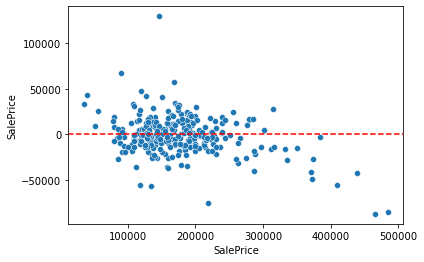

In [22]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

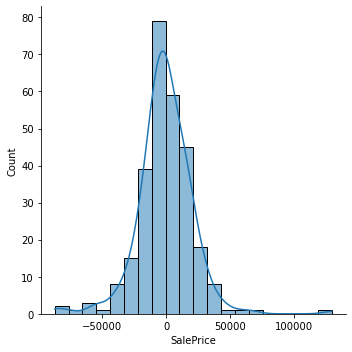

In [23]:
# If linear regression is working fine, we should get a normal distribution

sns.displot(residuals, bins=20, kde=True)

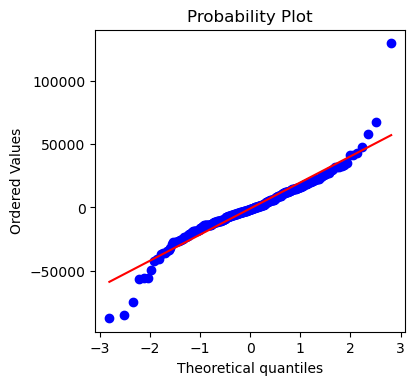

In [25]:
import scipy as sp

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
_ = sp.stats.probplot(residuals, plot=ax)

In [31]:
# Our best model is ElasticNet with alpha=8.46 and l1_ratio=0.99
# Build final model and test it

final_model = ElasticNet(alpha=8.46, l1_ratio=0.99, max_iter=100000)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

final_model.fit(X, y)

ElasticNet(alpha=8.46, l1_ratio=0.99, max_iter=100000)

In [32]:
# Dump final model for next step

import pickle

pickle.dump(final_model, open('model/final_model.ml', 'wb'))